    Problem Statement:
    1) classify whether the customer will cancel or not at the time of booking.
    2) Forecasting revenue for a future month and year

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/hotel_bookings.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Data Preprocesisng**

    company column had 94% missing value thus removing it.

In [7]:
df.drop(columns='company',inplace=True)

    agent has 14% missing values. checking if there is a cause for it.

In [8]:
df[df['agent'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,No Deposit,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,...,0,No Deposit,NaN,0,Transient,107.42,0,0,Check-Out,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119124,City Hotel,0,0,2017,August,35,29,0,1,1,...,0,No Deposit,NaN,0,Transient,0.00,0,2,Check-Out,2017-08-30
119151,City Hotel,0,0,2017,August,35,29,0,1,2,...,0,No Deposit,NaN,0,Transient,270.00,0,0,Check-Out,2017-08-30
119166,City Hotel,0,0,2017,August,35,30,0,1,1,...,0,No Deposit,NaN,0,Transient,140.00,0,0,Check-Out,2017-08-31
119215,City Hotel,0,2,2017,August,35,31,0,1,1,...,0,No Deposit,NaN,0,Transient,140.00,0,2,Check-Out,2017-09-01


In [9]:
df[df['agent']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


i take the judgement call that the missing vlaues on agent column were supossed to be 0, as there were no agents involved.

In [10]:
df[df['agent'].isnull()] = 0

    there are 100 missing value in country column, which is negligible compared to 100000 data points. thus drop them.

In [11]:
df.dropna(inplace=True)

In [12]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119234.000000,119234.000000,119234.000000,119234.000000,119234.000000,119234.000000,119234.000000,119234.000000,119234.000000,119234.000000,119234.000000,119234.000000,119234.000000,119234.000000,119234.000000,119234.000000,119234.000000,119234.000000,119234.000000
mean,0.336825,96.427068,1739.859906,23.592557,13.623329,0.844130,2.234765,1.639558,0.095988,0.006642,0.012111,0.066634,0.021026,0.174128,74.685207,2.260588,90.334424,0.045767,0.522485
std,0.472627,107.157671,693.341661,15.510710,9.808694,0.991473,1.981891,0.796771,0.384620,0.090230,0.109380,0.704820,0.404887,0.584686,107.068322,17.485198,58.780680,0.210141,0.771192
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,9.000000,2015.000000,11.000000,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,62.000000,0.000000,0.000000
50%,0.000000,59.000000,2016.000000,24.000000,13.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,89.320000,0.000000,0.000000
75%,1.000000,152.000000,2017.000000,36.000000,22.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,121.000000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,5400.000000,3.000000,5.000000


    reserved room type and assigned room type are just for anonymity reasons, thus droping those columns. 

In [13]:
df.drop(columns=['reserved_room_type','assigned_room_type'],inplace=True)

    suspisious values on number of babies.

In [14]:
df['babies'].value_counts()

babies
0     118470
1        751
2         11
10         1
9          1
Name: count, dtype: int64

    suspisious values on number of adults.

In [15]:
df['adults'].value_counts()

adults
2     81072
0     16666
1     15653
3      5788
4        50
26        5
Name: count, dtype: int64

    thus i take the judjemental call to remove these rows.

In [16]:
df = df[(df['babies'] != 10)&(df['babies'] != 9)]
df = df[(df['adults'] != 0)&(df['adults'] != 26)]

    suspisious vlaue in meal.

In [17]:
df[df['meal'] == 'Undefined'].iloc[:,9:]

,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3106,2,0.0,0,Undefined,ESP,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,65,Transient-Party,69.00,0,0,Check-Out,2015-11-24
3107,2,0.0,0,Undefined,ESP,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,65,Transient-Party,69.00,0,0,Check-Out,2015-11-24
3108,2,0.0,0,Undefined,ESP,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,65,Transient-Party,69.00,0,0,Check-Out,2015-11-24
3110,2,0.0,0,Undefined,ESP,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,0,Transient-Party,69.00,0,0,Check-Out,2015-11-24
3111,2,0.0,0,Undefined,ESP,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,65,Transient-Party,69.00,0,0,Check-Out,2015-11-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39833,3,0.0,0,Undefined,PRT,Direct,Direct,0,0,0,1,No Deposit,250.0,0,Transient,350.75,0,1,Check-Out,2017-08-30
39874,2,1.0,0,Undefined,PRT,Offline TA/TO,TA/TO,0,0,0,1,No Deposit,196.0,0,Transient,169.98,1,2,Check-Out,2017-08-31
39875,2,1.0,0,Undefined,PRT,Offline TA/TO,TA/TO,0,0,0,1,No Deposit,96.0,0,Group,204.00,1,2,Check-Out,2017-09-01
39906,2,0.0,0,Undefined,PRT,Direct,Direct,0,0,0,1,No Deposit,250.0,0,Transient,266.06,1,0,Check-Out,2017-09-01


    i take the judgement clal to drop these columns.

In [18]:
df = df[df['meal'] != 'Undefined']

**Exploratory Data Analysis**

    analysing the signifiance of baby column.

In [19]:
df['is_canceled'].value_counts()

is_canceled
0    61891
1    39840
Name: count, dtype: int64

In [20]:
pd.pivot_table(df, index='babies', columns='is_canceled', aggfunc='size', fill_value=0)

is_canceled,0,1
babies,,
0,61294,39692
1,588,146
2,9,2


    people with babies are half as likely to cancel. (taking into considetation the initial distribution of cancelations)

In [21]:
pd.pivot_table(df, index='adults', columns='is_canceled', aggfunc='size', fill_value=0)

is_canceled,0,1
adults,,
1,10386,5167
2,47803,32568
3,3665,2092
4,37,13


    people who travel with someone(2) are more likely to cancel. (taking into considetation the initial distribution of cancelations)

In [22]:
pd.pivot_table(df, index='total_of_special_requests', columns='is_canceled', aggfunc='size', fill_value=0)

is_canceled,0,1
total_of_special_requests,,
0,27473,29636
1,23211,7021
2,9145,2736
3,1791,419
4,242,28
5,29,0


    people with 0 special request are more likel yto chancel.

In [23]:
pd.pivot_table(df, index='required_car_parking_spaces', columns='is_canceled', aggfunc='size', fill_value=0)

is_canceled,0,1
required_car_parking_spaces,,
0,56494,39840
1,5374,0
2,20,0
3,3,0


    people who requer car parking space dont cnacel.

In [24]:
pd.pivot_table(df, index='customer_type', columns='is_canceled', aggfunc='size', fill_value=0)

is_canceled,0,1
customer_type,,
Contract,2785,1261
Group,430,35
Transient,44007,33198
Transient-Party,14669,5346


    people who travel in groups are less likely to cancel.

In [25]:
pd.pivot_table(df, index='deposit_type', columns='is_canceled', aggfunc='size', fill_value=0)

is_canceled,0,1
deposit_type,,
No Deposit,61813,27460
Non Refund,54,12356
Refundable,24,24


    people who deposited are likely to chancel.

In [26]:
pd.pivot_table(df, index='distribution_channel', columns='is_canceled', aggfunc='size', fill_value=0)

is_canceled,0,1
distribution_channel,,
Corporate,714,408
Direct,5557,1337
GDS,154,37
TA/TO,55466,38058


    GDS are less likely to cancel

In [27]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'agent', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

merging some rare columns.

In [28]:
df['deposit_type'].replace({'Refundable':'Deposit','Non Refund':'Deposit'}, inplace=True)
df['distribution_channel'].replace({'Corporate':'Rare','GDS':'Rare'}, inplace=True)
df['market_segment'].replace({'Aviation':'Rare','Complementary':'Rare','Corporate':'Rare'}, inplace=True)
df['meal'].replace({'FB':'rare'}, inplace=True)

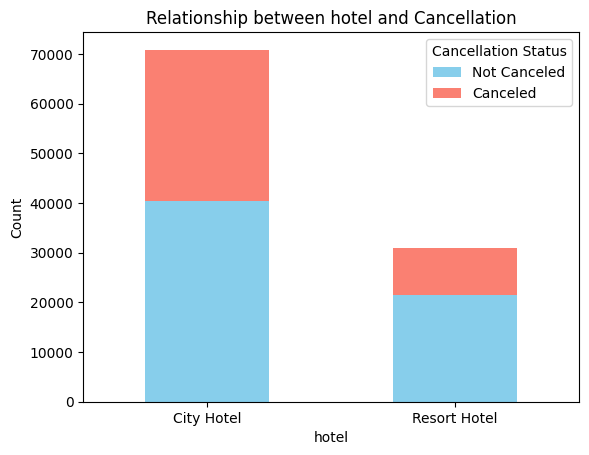

In [29]:
grouped_data = df.groupby(['hotel', 'is_canceled']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

plt.title('Relationship between hotel and Cancellation')
plt.xlabel('hotel')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.show()

    City Hotels are likely to cancel

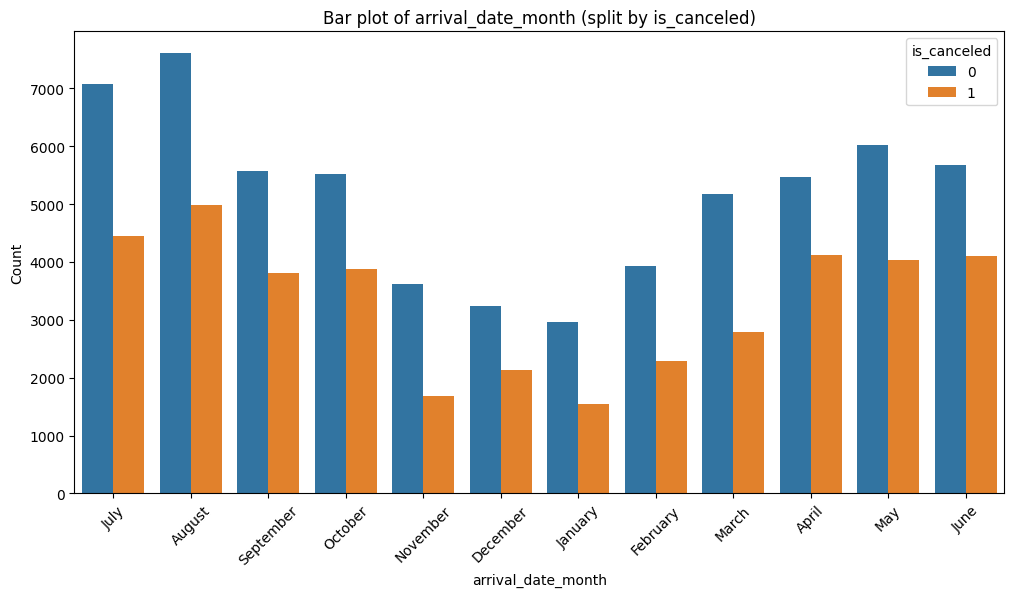

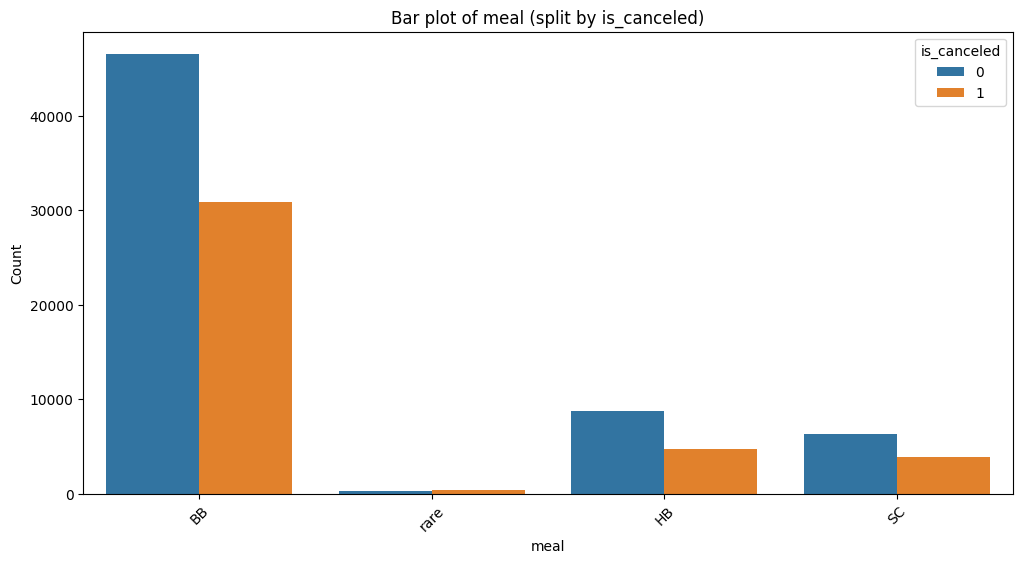

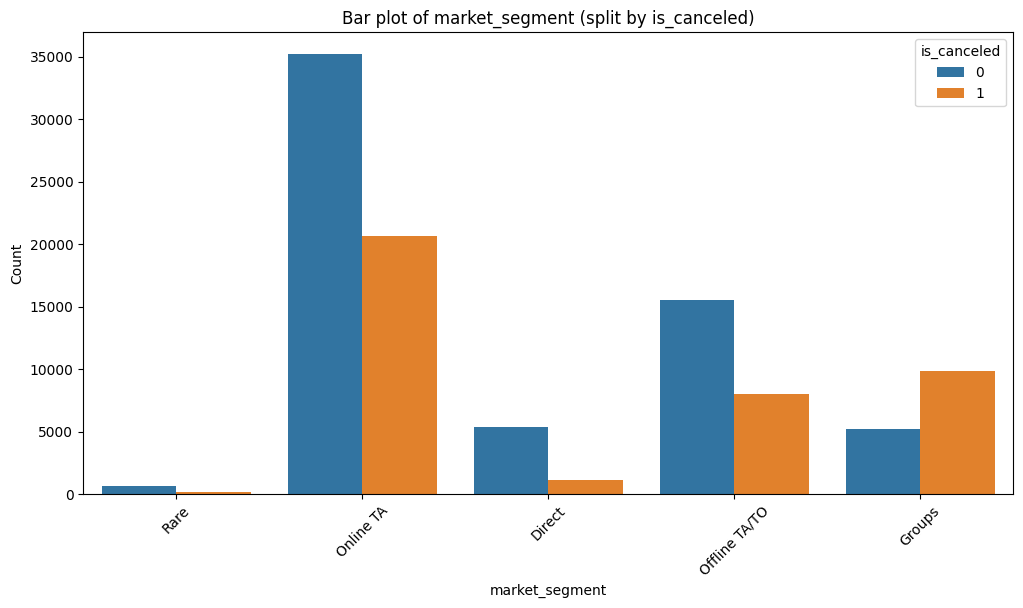

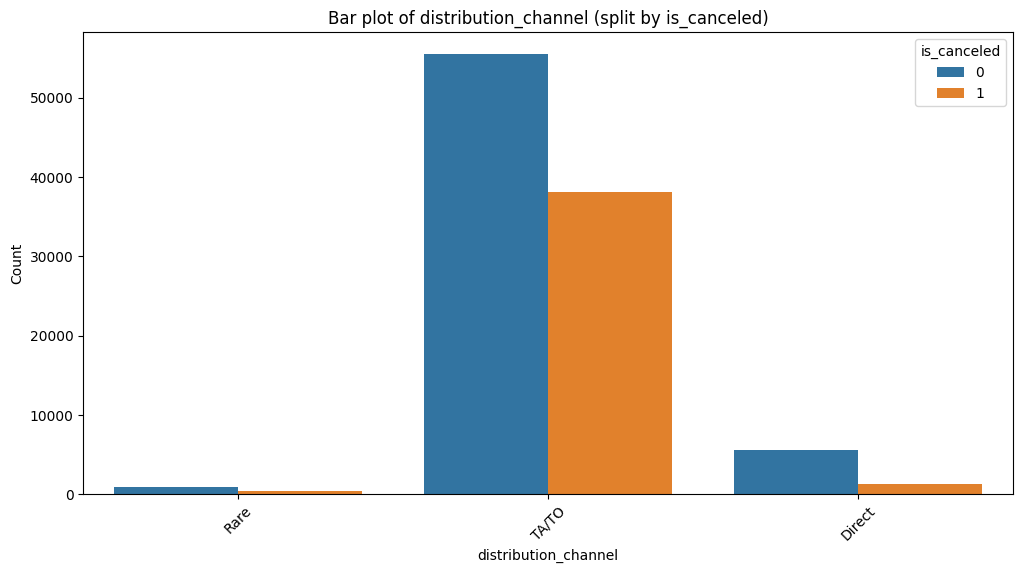

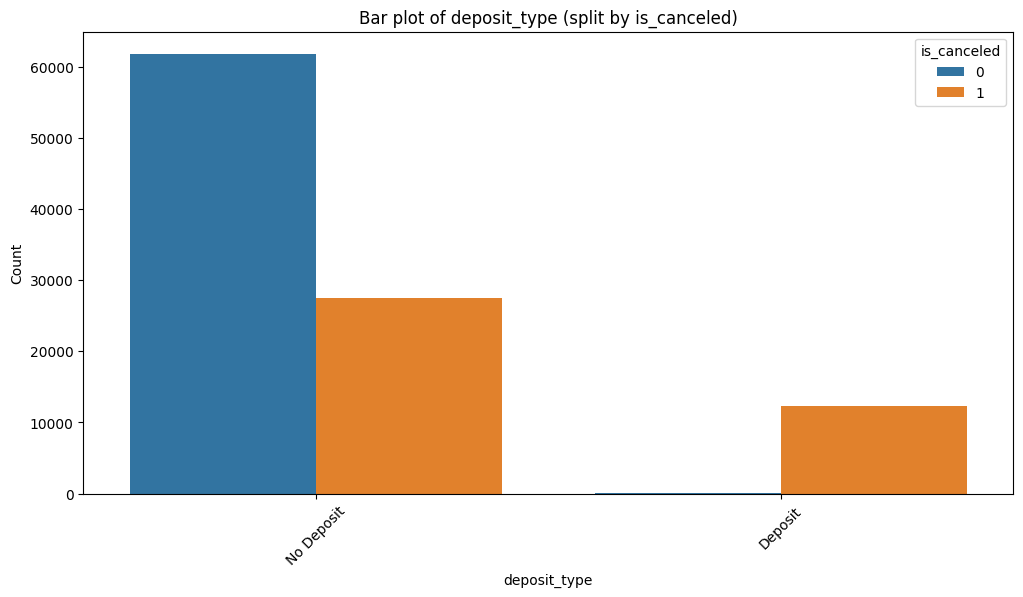

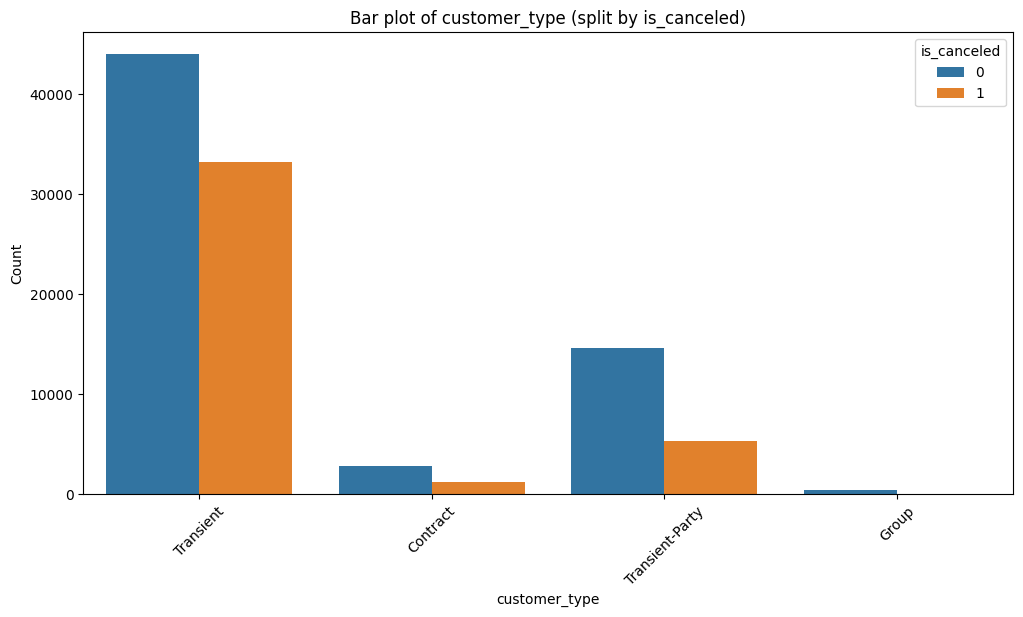

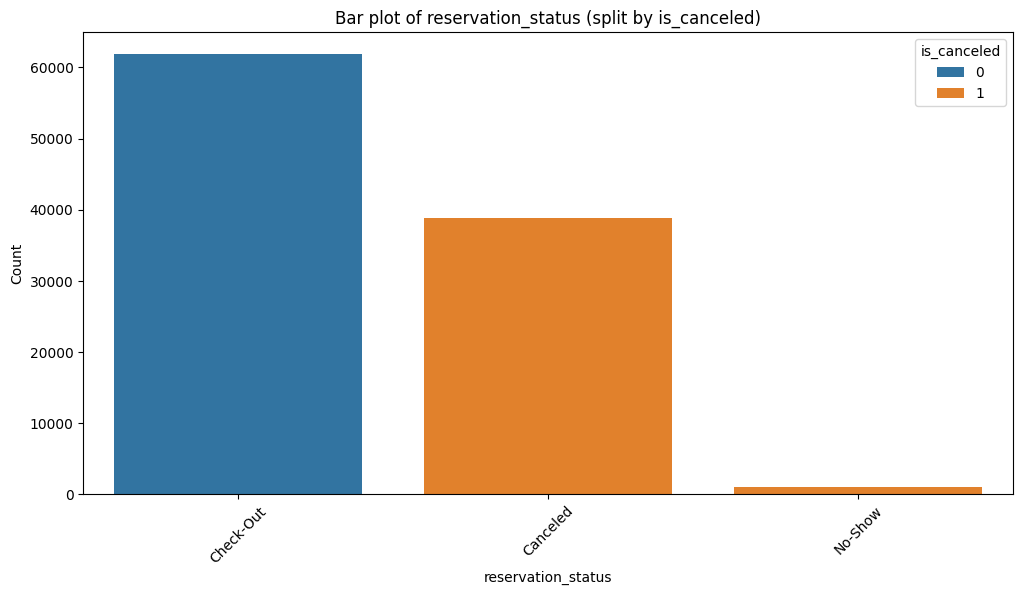

In [30]:
bal_columns = df.select_dtypes('object').drop(columns=['hotel', 'country','reservation_status_date'])

for col in bal_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col, hue='is_canceled')
    plt.title(f'Bar plot of {col} (split by is_canceled)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='is_canceled', loc='upper right')
    plt.show()

    this shows the distribution of catogorical columns int he data

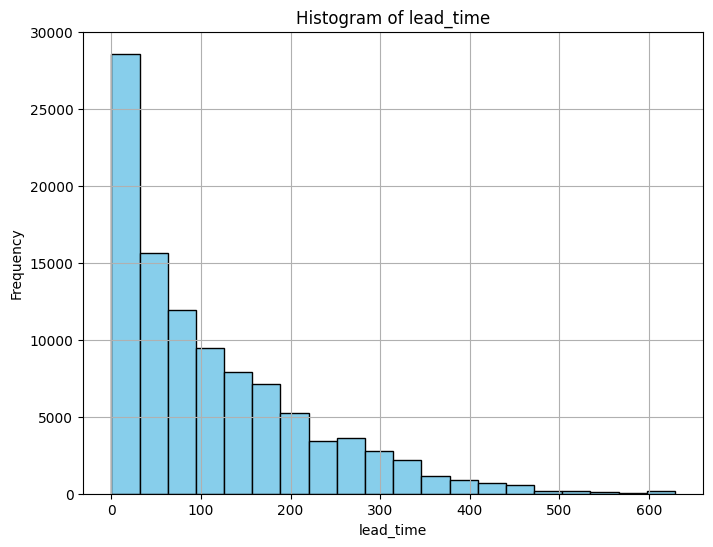

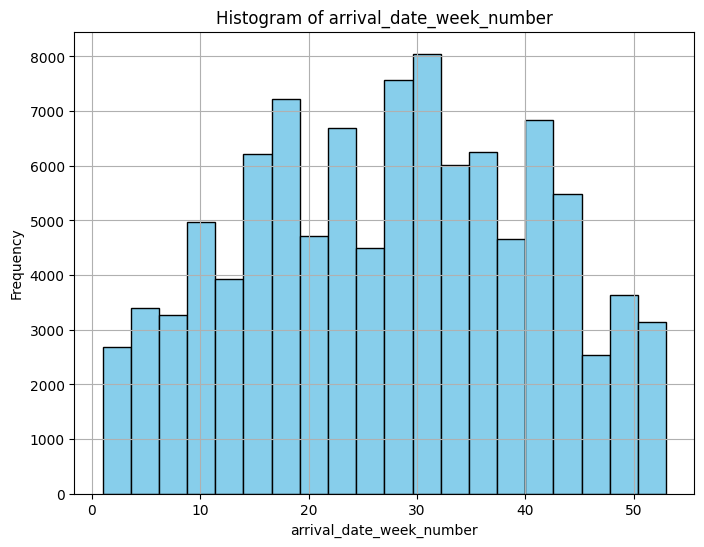

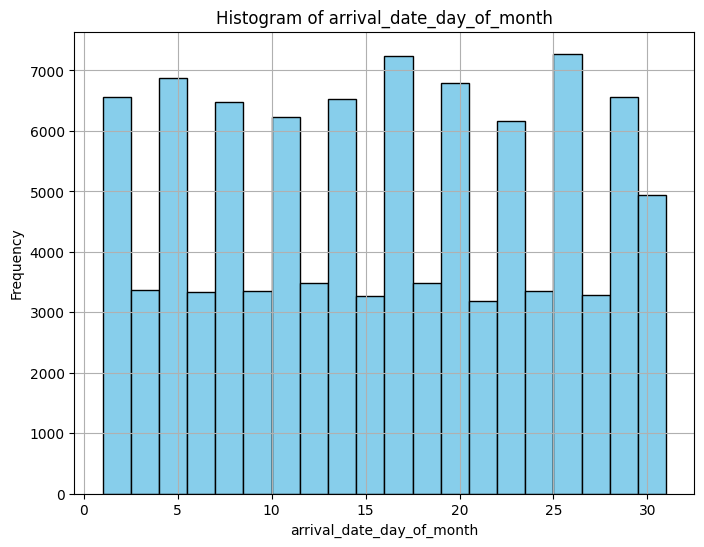

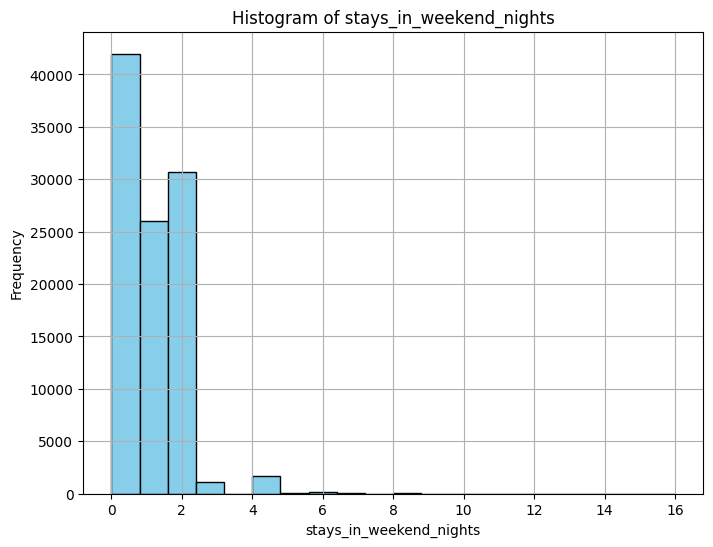

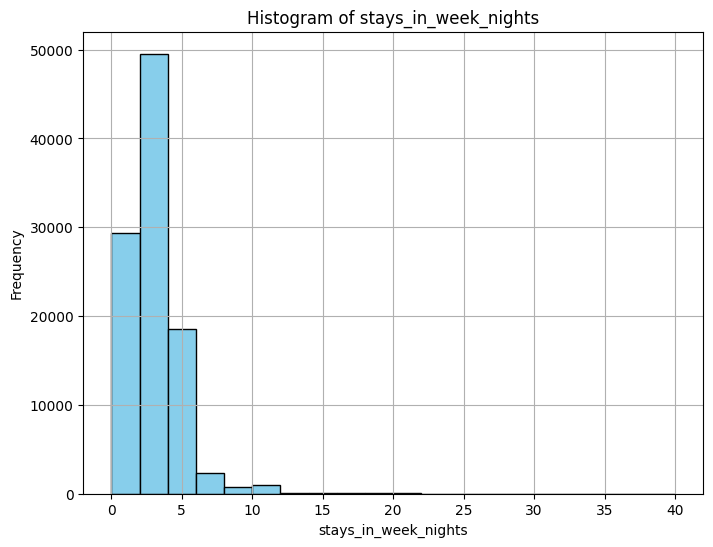

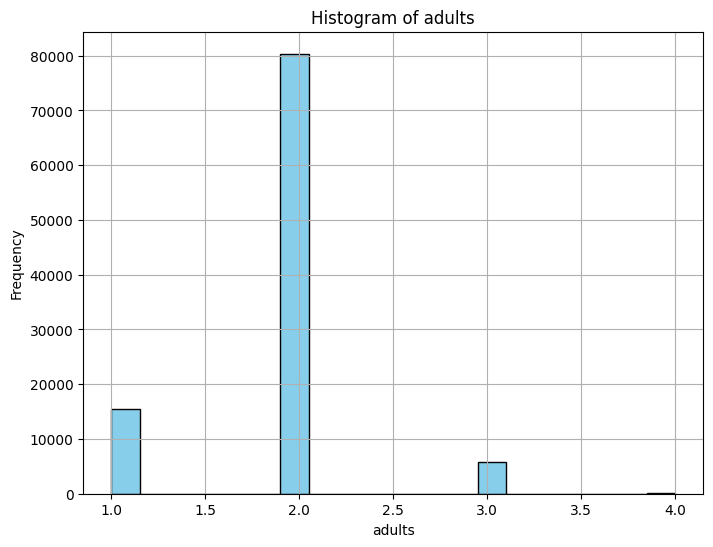

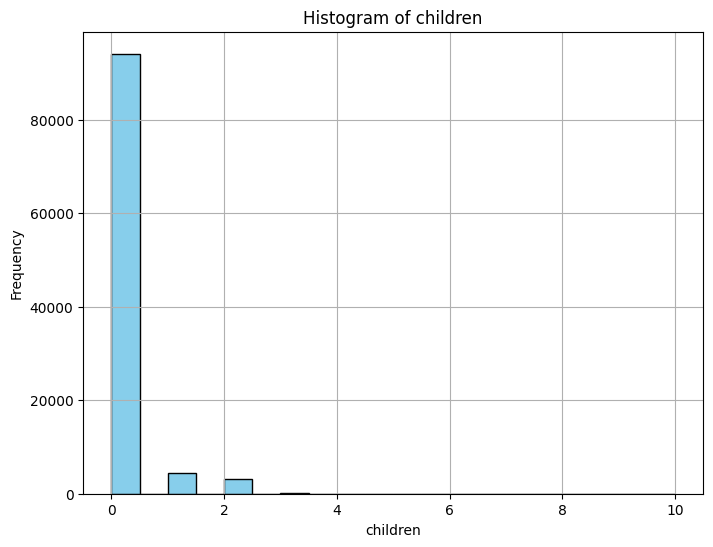

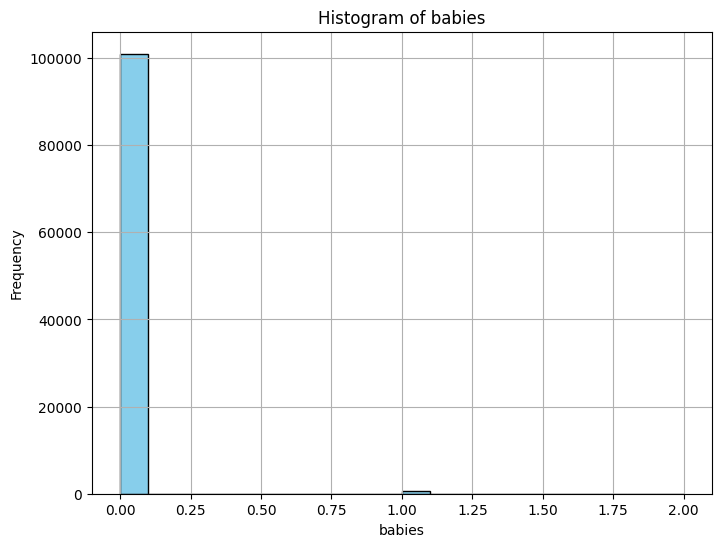

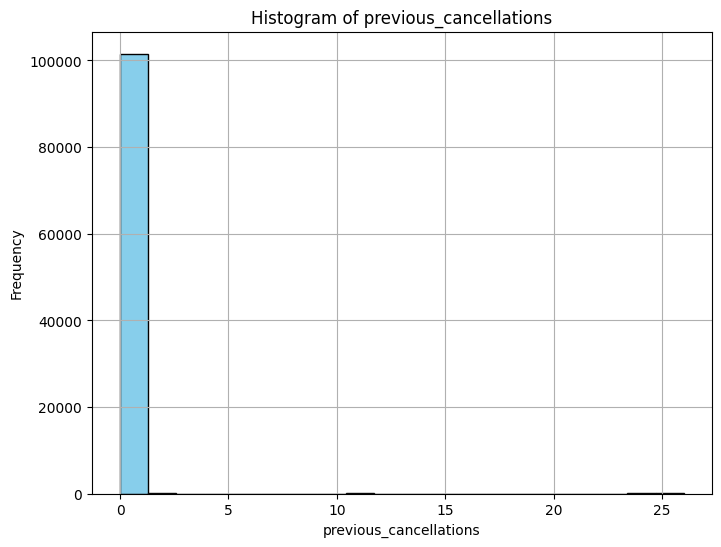

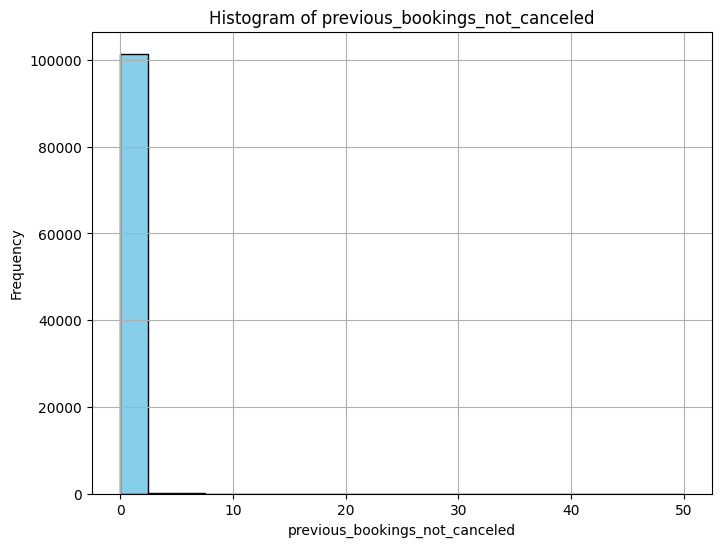

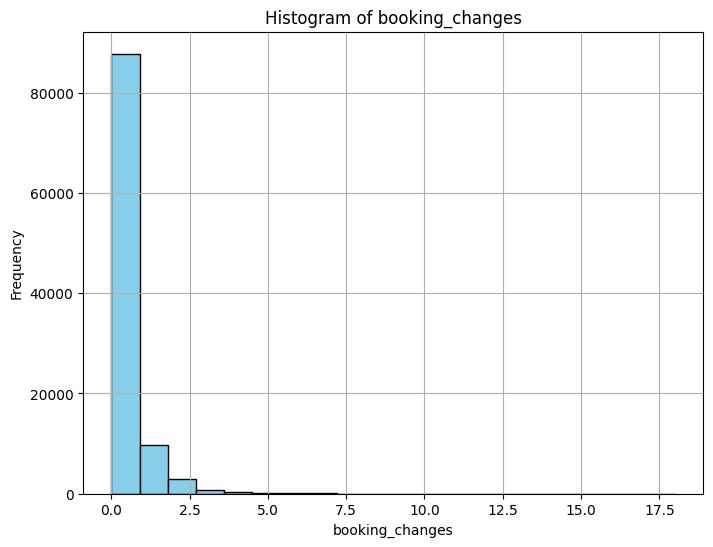

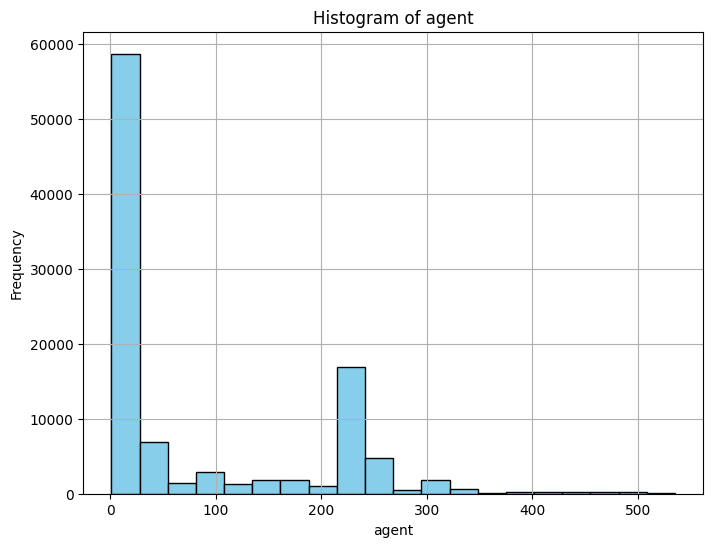

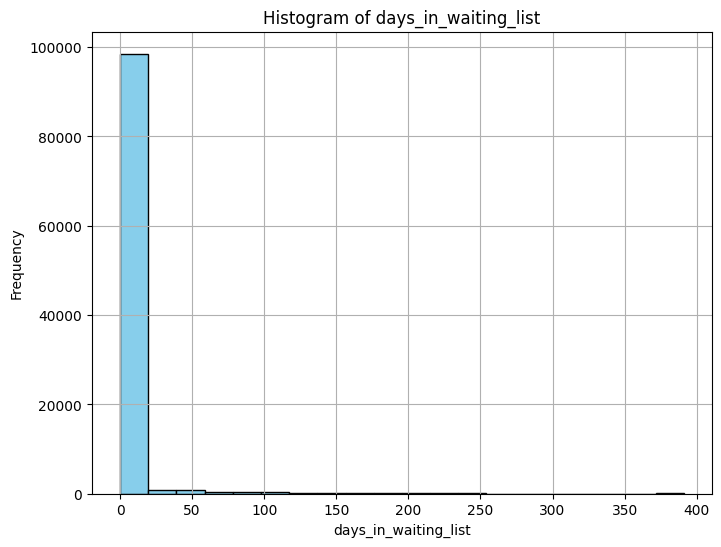

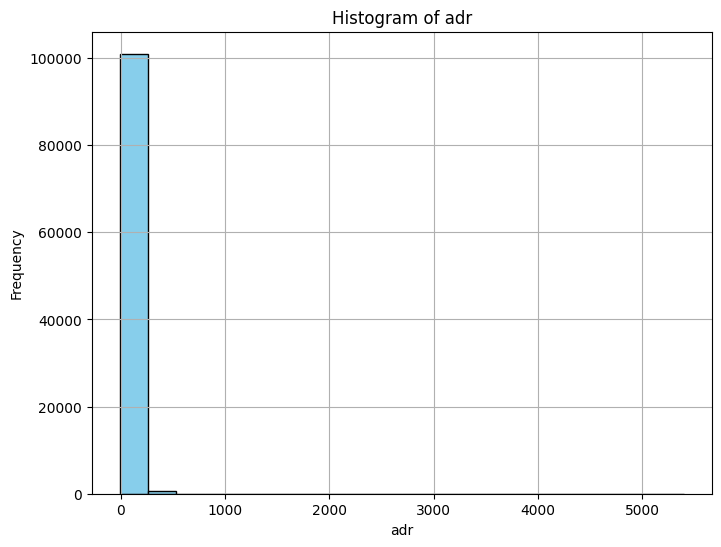

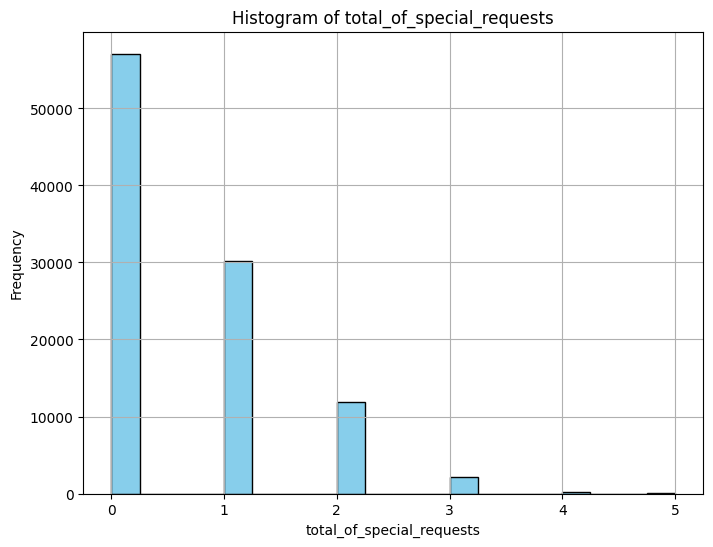

In [31]:
ordinal_cols =  ['is_canceled','arrival_date_year','is_repeated_guest','required_car_parking_spaces']
numeric_columns = df.select_dtypes(exclude='object').drop(
                    columns=ordinal_cols).columns

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    df[column].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    this is the distribution of nmaric columns.

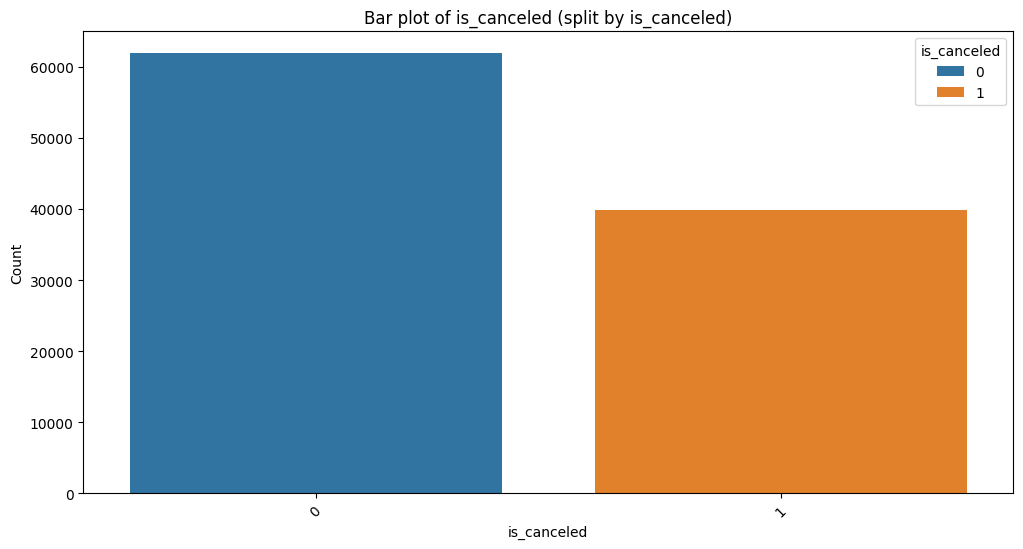

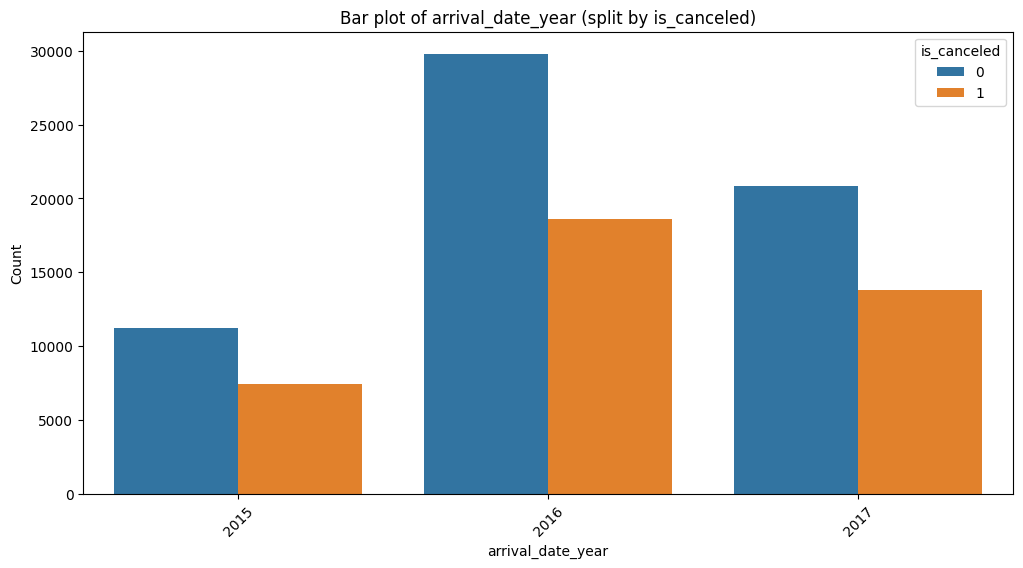

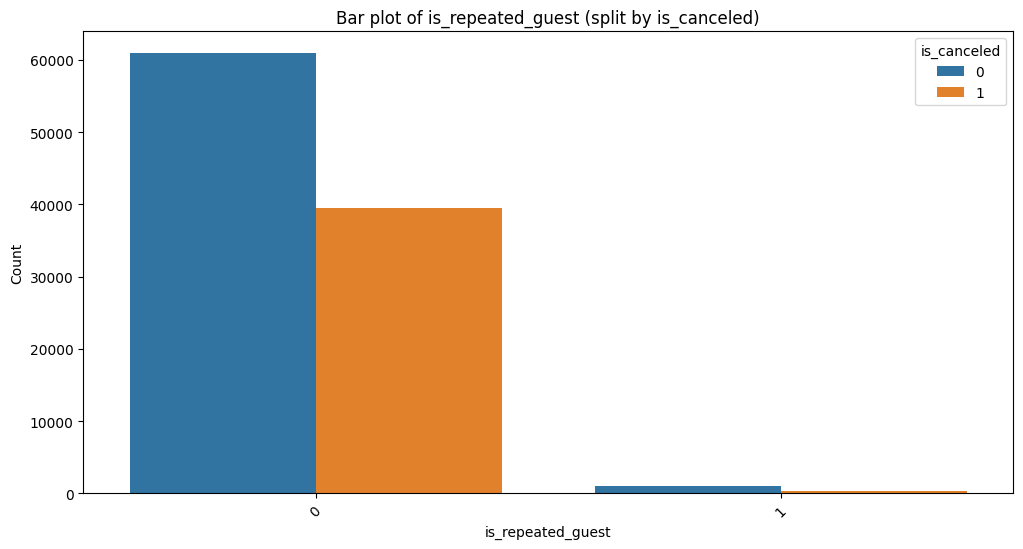

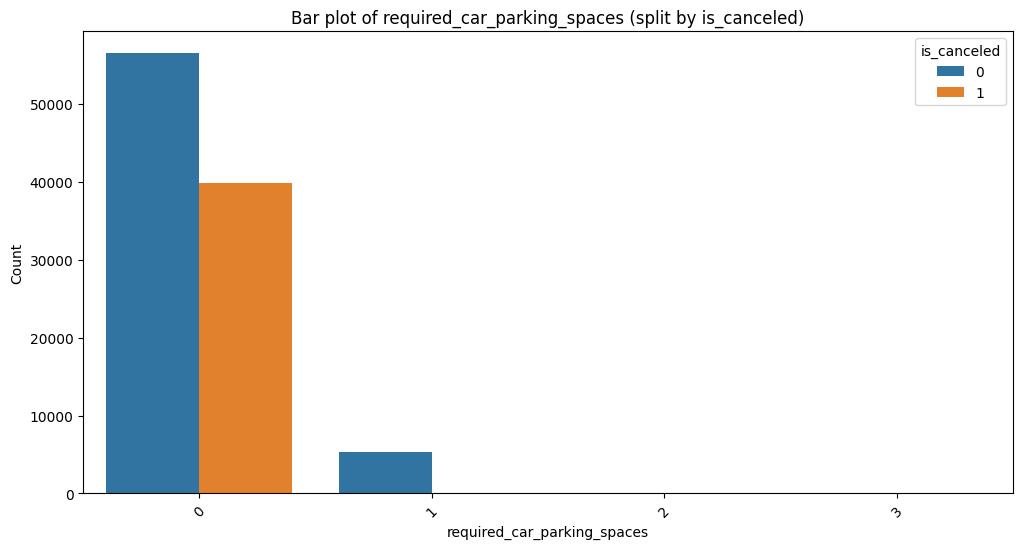

In [32]:
bal_columns = df[ordinal_cols]

for col in bal_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col, hue='is_canceled')
    plt.title(f'Bar plot of {col} (split by is_canceled)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='is_canceled', loc='upper right')
    plt.show()

    this is the distribution of ordinal data.

**split the data**

In [33]:
X = df.drop(columns=['is_canceled','reservation_status','reservation_status_date'])
y = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**data preprocesing**

In [34]:
cat_columns = X.select_dtypes(include='object').columns
num_train_columns = X_train.select_dtypes(exclude='object').columns
num_test_columns = X_test.select_dtypes(exclude='object').columns

def data_encode(cat_columns,num_train_columns,num_test_columns):
    encoder = OneHotEncoder(handle_unknown='ignore')
    scaler = StandardScaler()

    X_train_encoded = encoder.fit_transform(X_train[cat_columns])
    X_test_encoded = encoder.transform(X_test[cat_columns])

    X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), columns=encoder.get_feature_names_out(cat_columns))
    X_test_encoded_df = pd.DataFrame(X_test_encoded.toarray(), columns=encoder.get_feature_names_out(cat_columns))

    X_train_numeric = pd.DataFrame(scaler.fit_transform(X_train[num_train_columns]))
    X_test_numeric = pd.DataFrame(scaler.transform(X_test[num_test_columns]))
    X_train_numeric.columns = num_train_columns
    X_test_numeric.columns = num_test_columns

    X_train_final = pd.concat([X_train_encoded_df, X_train_numeric], axis=1)
    X_test_final = pd.concat([X_test_encoded_df, X_test_numeric], axis=1)

    return X_train_final,X_test_final

X_train_final, X_test_final = data_encode(cat_columns,num_train_columns,num_test_columns)

**train the model**

In [35]:
def predict_and_evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    return y_pred, accuracy, classification_rep, confusion_mat

**1) classify whether the customer will cancel or not at the time of booking.**

    Assumptions:
    1) we assume we have the data from each column for prediction.
    2) we assume we can classify them based on if else statements.
    3) we assume that the seasonality aspect is negligible in this data.

In [36]:
random_forest = RandomForestClassifier(n_estimators=100,criterion='entropy',n_jobs=-1,class_weight='balanced_subsample')
random_forest.fit(X_train_final, y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       n_jobs=-1)

In [37]:
y_pred, accuracy, c_rep, cm = predict_and_evaluate(random_forest,X_train_final,y_train)

print("Accuracy:", accuracy)
print("Classification Report:")
print(c_rep)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9957362626560503
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49602
           1       0.99      1.00      0.99     31782

    accuracy                           1.00     81384
   macro avg       1.00      1.00      1.00     81384
weighted avg       1.00      1.00      1.00     81384

Confusion Matrix:
[[49382   220]
 [  127 31655]]


In [38]:
y_pred, accuracy, c_rep, cm = predict_and_evaluate(random_forest,X_test_final,y_test)

print("Accuracy:", accuracy)
print("Classification Report:")
print(c_rep)
print("Confusion Matrix:")
print(cm)
f1_forest = f1_score(y_test, y_pred, average='weighted')

Accuracy: 0.8867154863124785
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     12289
           1       0.89      0.82      0.85      8058

    accuracy                           0.89     20347
   macro avg       0.89      0.87      0.88     20347
weighted avg       0.89      0.89      0.89     20347

Confusion Matrix:
[[11461   828]
 [ 1477  6581]]


    the f1-score of train is 1
    the f1-score of test is 0.88
    this is a good score.

    Dicison tree model

In [39]:
decision_tree = DecisionTreeClassifier(random_state=42,criterion='entropy',splitter='best')
decision_tree.fit(X_train_final, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [40]:
y_pred, accuracy, c_rep, cm = predict_and_evaluate(decision_tree,X_train_final,y_train)

print("Accuracy:", accuracy)
print("Classification Report:")
print(c_rep)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9958468495035879
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49602
           1       1.00      0.99      0.99     31782

    accuracy                           1.00     81384
   macro avg       1.00      1.00      1.00     81384
weighted avg       1.00      1.00      1.00     81384

Confusion Matrix:
[[49486   116]
 [  222 31560]]


In [41]:
y_pred, accuracy, c_rep, cm = predict_and_evaluate(decision_tree,X_test_final,y_test)

print("Accuracy:", accuracy)
print("Classification Report:")
print(c_rep)
print("Confusion Matrix:")
print(cm)
f1_tree = f1_score(y_test, y_pred, average='weighted')

Accuracy: 0.8518209072590553
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12289
           1       0.81      0.81      0.81      8058

    accuracy                           0.85     20347
   macro avg       0.85      0.84      0.85     20347
weighted avg       0.85      0.85      0.85     20347

Confusion Matrix:
[[10798  1491]
 [ 1524  6534]]


    the f1-score is 0.85 for decision tree.
    which is fairly good.

In [41]:
plt.figure(figsize=(100,100))  
plot_tree(decision_tree, feature_names=X_train_final.columns, class_names=['class_0', 'class_1'], filled=True, rounded=True, max_depth=3)
plt.show()

In [99]:
knn = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
knn.fit(X_train_final, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [100]:
y_pred, accuracy, c_rep, cm = predict_and_evaluate(knn,X_train_final,y_train)

print("Accuracy:", accuracy)
print("Classification Report:")
print(c_rep)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9059888921655362
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     49602
           1       0.89      0.87      0.88     31782

    accuracy                           0.91     81384
   macro avg       0.90      0.90      0.90     81384
weighted avg       0.91      0.91      0.91     81384

Confusion Matrix:
[[46041  3561]
 [ 4090 27692]]


In [101]:
y_pred, accuracy, c_rep, cm = predict_and_evaluate(knn,X_test_final,y_test)

print("Accuracy:", accuracy)
print("Classification Report:")
print(c_rep)
print("Confusion Matrix:")
print(cm)
f1_knn = f1_score(y_test, y_pred, average='weighted')

Accuracy: 0.8246916007273799
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86     12289
           1       0.78      0.77      0.78      8058

    accuracy                           0.82     20347
   macro avg       0.82      0.82      0.82     20347
weighted avg       0.82      0.82      0.82     20347

Confusion Matrix:
[[10575  1714]
 [ 1853  6205]]


    the f1-score for knn is lower : 0.82
    we stick with dicision tree

    comparing hte models:

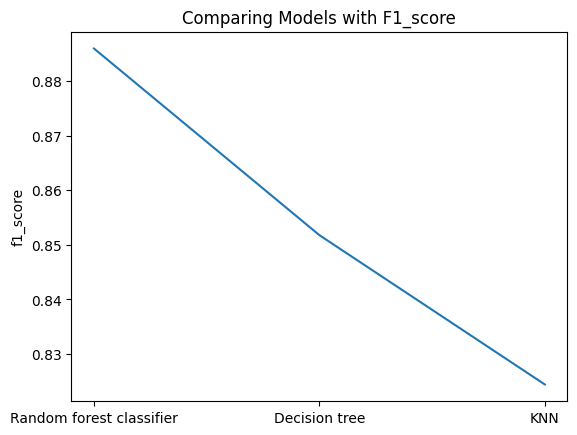

In [118]:
f1_scores = [f1_forest, f1_tree, f1_knn]
classifiers = ['Random forest classifier', 'Decision tree', 'KNN']

plt.plot(classifiers, f1_scores)
plt.ylabel('f1_score')
plt.title('Comparing Models with F1_score')
plt.show()

**Intepretation of the results**:

    Problem:
    1) Customer Keeps cancelling.
    Solution:
    1) This model will help you plan your business in a better manner.
    2) If as a hotel or resort manager I think someone is going to cancel, I can send those customer a 10% to 15% off coupon. 

**2) Forecasting revenue for a future month and year.**

    The assumptions:
    1) the peak hour patters dose not chance by year(seasonality remains constant).
    2) we assume that Forcasting next year will folow a linear trend(after removing the seasonality).

    the columns we chosse for this:
    1) adults, children, required_car_parking_spaces, total_of_special_requests, hotel
    Creating new columns from exisiting columns:
    1) month : 'arrival_date_month' if 'is_canceled' is false
    2) year : 'arrival_date_year' if 'is_canceled' is false
    3) revenue : 'adr' * ('stays_in_week_nights' + 'stays_in_weekend_nights')

      we are segmenting the data based on this:
      hotel
      we agregate the data based on this:
      month and year

In [42]:
dummy_df = df[['hotel', 'is_canceled', 'arrival_date_year',
       'arrival_date_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests']]

# creating new column
dummy_df['revenue'] = dummy_df['adr'] * (dummy_df['stays_in_weekend_nights'] + dummy_df['stays_in_week_nights'] )
dummy_df = dummy_df.drop(columns=['adr','stays_in_weekend_nights','stays_in_week_nights'])
dummy_df = dummy_df[dummy_df['is_canceled'] == 0]
dummy_df = dummy_df.drop(columns=['is_canceled'])

# spliting based on hotel
city_dummy_df = dummy_df[dummy_df['hotel'] == 'City Hotel']
resort_dummy_df = dummy_df[dummy_df['hotel'] == 'Resort Hotel']
city_dummy_df = city_dummy_df.drop(columns='hotel')
resort_dummy_df = resort_dummy_df.drop(columns='hotel')

# agregate the data with month and year
city_col_names = list(city_dummy_df.columns)
resort_col_names = list(resort_dummy_df.columns)

city_dummy_df = city_dummy_df.groupby(['arrival_date_year', 'arrival_date_month']).agg({'adults': 'sum',  'children': 'sum', 'required_car_parking_spaces': 'sum',
                                                                                        'total_of_special_requests': 'sum', 'revenue': 'sum' }).reset_index()
resort_dummy_df = resort_dummy_df.groupby(['arrival_date_year', 'arrival_date_month']).agg({'adults': 'sum',  'children': 'sum', 'required_car_parking_spaces': 'sum',
                                                                                        'total_of_special_requests': 'sum', 'revenue': 'sum' }).reset_index()
city_dummy_df.columns = city_col_names
resort_dummy_df.columns = resort_col_names

visualising the seasonality for city hotel and resort hotels.

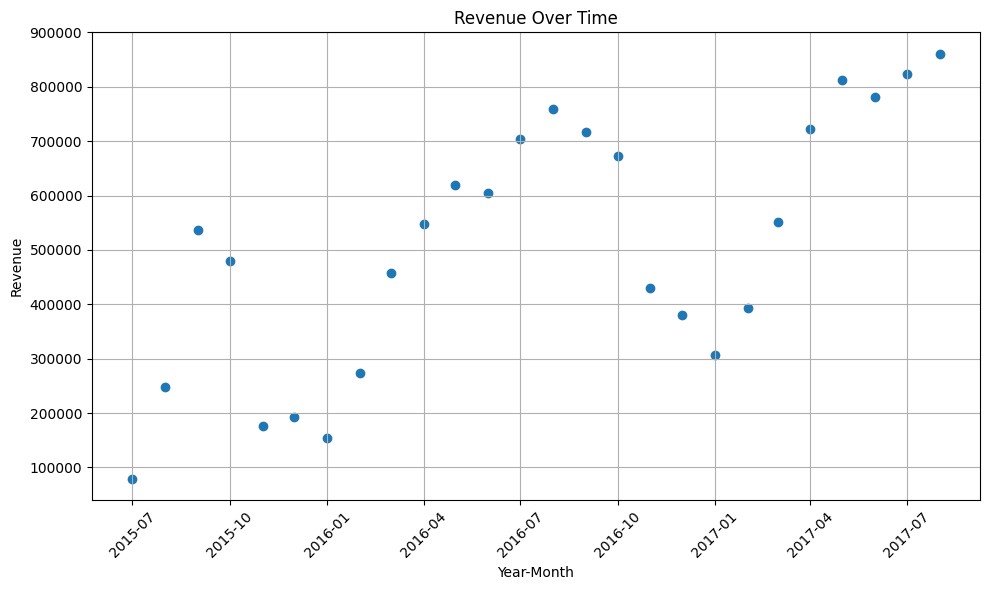

In [43]:
city_dummy_df['arrival_date_month_new'] = pd.to_datetime(city_dummy_df['arrival_date_month'], format='%B').dt.month
city_dummy_df['date'] = pd.to_datetime(city_dummy_df['arrival_date_year'].astype(str) + '-' + city_dummy_df['arrival_date_month_new'].astype(str), format='%Y-%m')
city_dummy_df = city_dummy_df.sort_values(by='date').reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.scatter(city_dummy_df['date'], city_dummy_df['revenue'], marker='o', linestyle='-')
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.title('Revenue Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

the seasonality in city looks aditive.

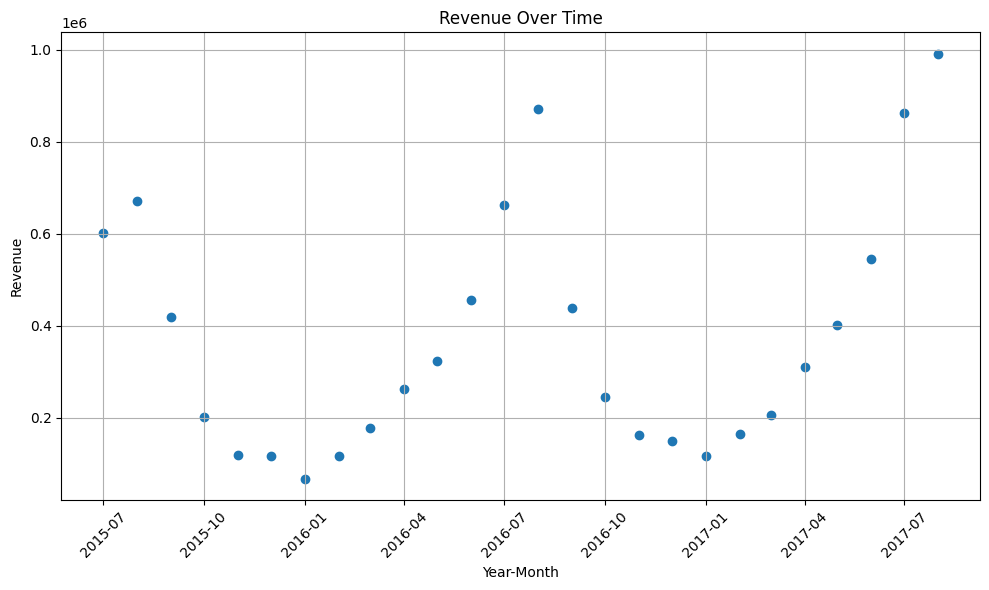

In [44]:
resort_dummy_df['arrival_date_month_new'] = pd.to_datetime(resort_dummy_df['arrival_date_month'], format='%B').dt.month
resort_dummy_df['date'] = pd.to_datetime(resort_dummy_df['arrival_date_year'].astype(str) + '-' + resort_dummy_df['arrival_date_month_new'].astype(str), format='%Y-%m')

plt.figure(figsize=(10, 6))
plt.scatter(resort_dummy_df['date'], resort_dummy_df['revenue'], marker='o', linestyle='-')
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.title('Revenue Over Time')
plt.xticks(rotation=45)  
plt.grid(True)
plt.tight_layout()
plt.show()

the seasonality in resort looks multiplicative.

In [45]:
result_city = seasonal_decompose(city_dummy_df['revenue'], model='additive', period=12)
result_resort = seasonal_decompose(resort_dummy_df['revenue'], model='multiplicative', period=12)

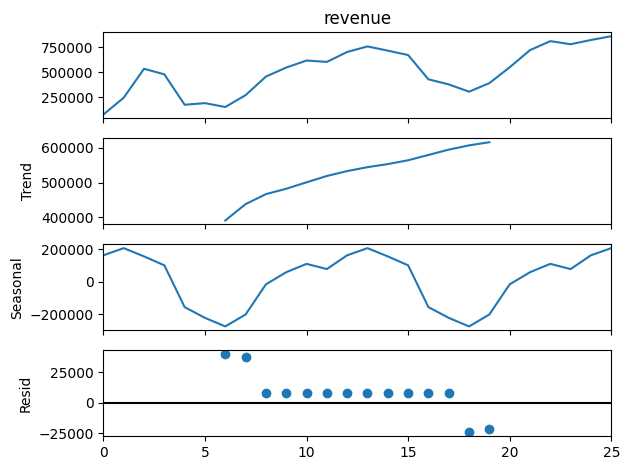

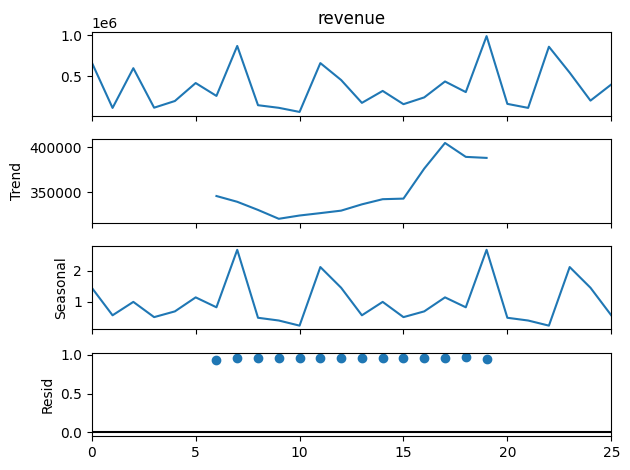

In [46]:
result_city.plot()
result_resort.plot()
plt.show()

as the trend in reosrt hotels is not linear we are focusing on city hotels.

In [47]:
trend_city = result_city.trend.dropna()
X_city = pd.DataFrame(np.arange(len(trend_city)))
y_city = pd.DataFrame(trend_city.values)

In [48]:
lr_city = LinearRegression()
lr_city.fit(X_city, y_city)

LinearRegression()

In [49]:
B1 = lr_city.coef_
B0 = lr_city.intercept_
B1,B0

(array([[15596.05553846]]), array([426494.55888095]))

In [50]:
print('R^2 :',lr_city.score(X_city, y_city))

R^2 : 0.9599438996284045


the high R^2 says the model is good.

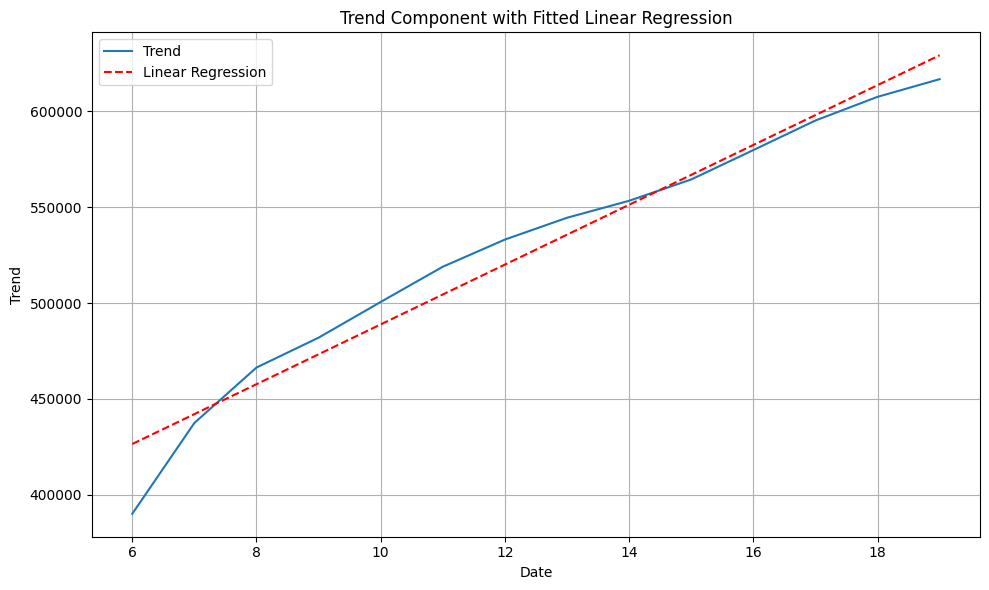

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(trend_city.index, trend_city, label='Trend')
plt.plot(trend_city.index, lr_city.predict(X_city), color='red', linestyle='--', label='Linear Regression')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend Component with Fitted Linear Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

the model is able to predict the trend fairly well.

In [52]:
city_seasonality_2016 = np.array(result_city.seasonal)[6:-8] 

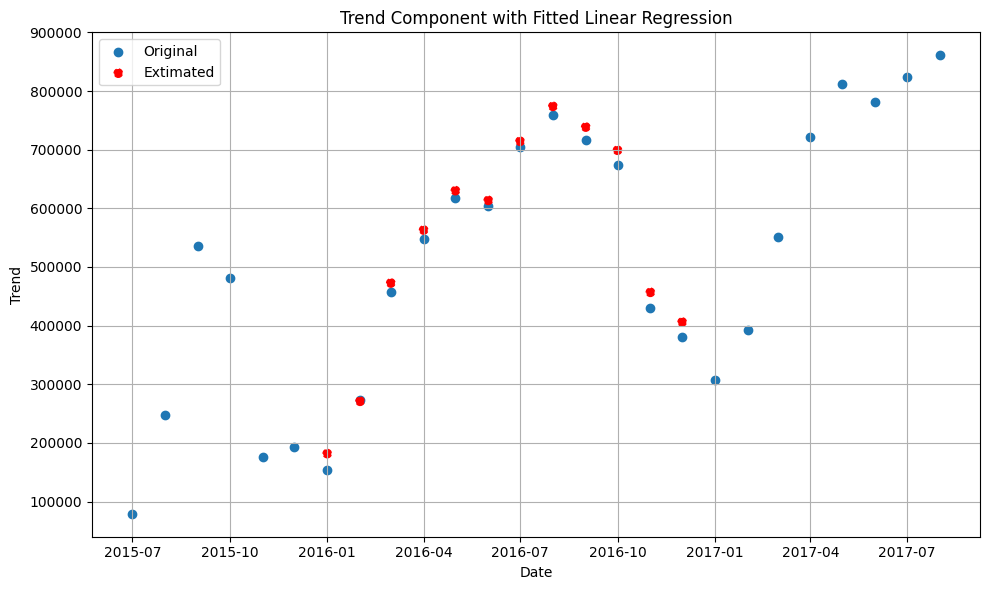

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(city_dummy_df['date'],np.array(city_dummy_df['revenue']), label='Original')
plt.scatter(city_dummy_df.sort_values(by='date')['date'].iloc[6:-8], city_seasonality_2016 + lr_city.predict(np.arange(-4,len(trend_city)+8).reshape((-1, 1))).reshape(1,-1)[0][6:-8] ,
             color='red', linestyle='--', label='Extimated')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend Component with Fitted Linear Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

seasonality + predicted trend for 2016.

this is the final model, for predicting revenue of a given month and year.

In [54]:
user_input_year = 2018
user_input_month = 8

def predict_revenue(user_input_year, user_input_month):
    extrapolation_index = (user_input_year - 2016) * 12 + user_input_month + 1 
    if user_input_year < 2016:
        extrapolation_index -= 2
        
    predict_revenue_trend = lr_city.predict([[extrapolation_index]])[0] 
    predict_revenue = predict_revenue_trend + city_seasonality_2016[user_input_month]
    return predict_revenue
predict_revenue(user_input_year,user_input_month)

array([1097334.48868143])

Testing the model.

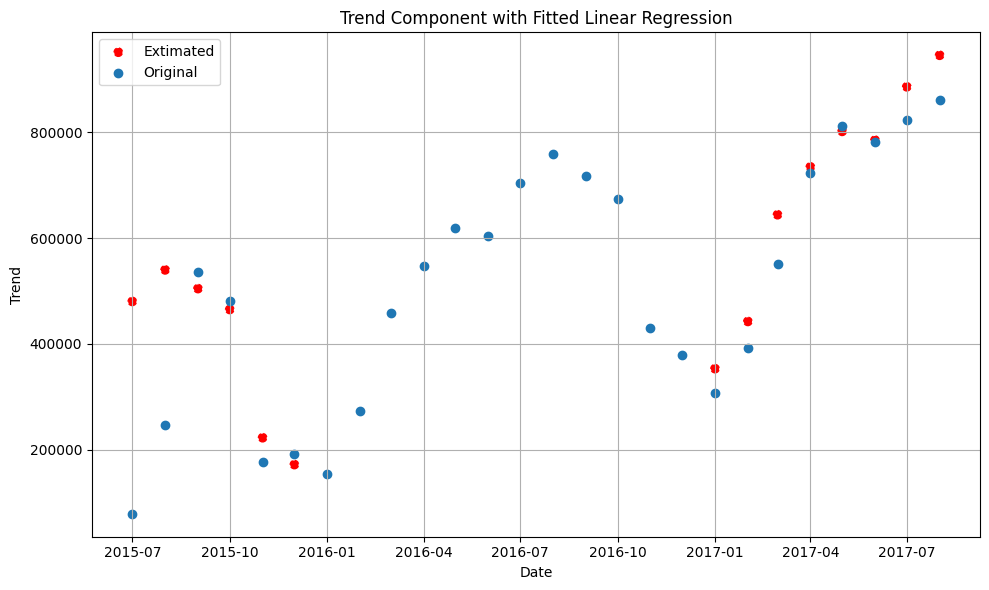

In [55]:
test_df = city_dummy_df[city_dummy_df['date'] >= '2017-01-01']
test_df2 = city_dummy_df[city_dummy_df['date'] <= '2016-01-01']
plt.figure(figsize=(10, 6))

for i in range(0,8):
    plt.scatter(test_df['date'].iloc[i],predict_revenue(2017,i),color='red', linestyle='--')

for i in range(0,5):
    plt.scatter(test_df2['date'].iloc[i],predict_revenue(2015,i+6),color='red', linestyle='--')
plt.scatter(test_df2['date'].iloc[5],predict_revenue(2015,5+6),color='red', linestyle='--', label='Extimated')

plt.scatter(city_dummy_df['date'],np.array(city_dummy_df['revenue']), label='Original')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend Component with Fitted Linear Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

the model is able to predict the test data faitly well.

lets calculate the sum of square error.

In [56]:
list_2017_pred = []
list_2015_pred = []
list_2017_actual = list(city_dummy_df[city_dummy_df['date'] >= '2017-01-01']['revenue'])
list_2015_actual = list(city_dummy_df[city_dummy_df['date'] <= '2016-01-01']['revenue'])

for i in range(0,8):
    list_2017_pred.append(predict_revenue(2017,i)[0])
for i in range(0,5):
    list_2015_pred.append(predict_revenue(2015,i+6)[0])

sse_2017 = sum((x - y) ** 2 for x, y in zip(list_2017_pred, list_2017_actual))
sse_2015 = sum((x - y) ** 2 for x, y in zip(list_2015_pred, list_2015_actual))

rmse_2017 = np.sqrt(sse_2017)
rmse_2015 = np.sqrt(sse_2015)

print(f'Sum of squared error for 2017: {rmse_2017}')
print(f'Sum of squared error for 2015: {rmse_2015}')

Sum of squared error for 2017: 157099.98116753652
Sum of squared error for 2015: 500131.2876051309


Note: We were not able to use these columns 'adults', 'children', 'required_car_parking_spaces', 'total_of_special_requests'
      for our model due to technical limitations.

**Interpretation of results**:

    Problem:
    1) Predictive Revenue?
    Solution:
    1) As a hotel, if I know the revenue going to be generated in the future, I will increase man power in that month. 
    2) Better Pricing strategy.
    3) Increase the resources according to the seasonality.
    4) Making a only 60% refund policy.